In [19]:
import os
import sys
os.environ["JAVA_HOME"] = "../data-engineering/.JDK 8"
os.environ["PYSPARK_PYTHON"] = sys.executable
os.environ["PYSPARK_DRIVER_PYTHON"] = sys.executable

In [20]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count
from pyspark.sql import functions as F
import requests, json

In [21]:
# Create SparkSession
spark = SparkSession \
    .builder \
        .appName("GreenDataAnalyticsProjectII") \
            .getOrCreate()

In [22]:
df = spark.read.csv("cleanedAirQualityData.csv", inferSchema=True, header=True)

In [23]:
url = "jdbc:postgresql://localhost:5432/etlassignment"
properties = {
    "user": "postgres",
    "password": "Cheesecake",
    "driver": "org.postgresql.Driver"
}

df.write.jdbc(url=url, table="airqualitybristol", properties=properties, mode="overwrite")

In [24]:
df.createOrReplaceTempView("table_view")


In [25]:
spark.sql("""
    SELECT `Location Type`, COUNT(*) as count 
FROM table_view 
GROUP BY `Location Type`
ORDER BY count DESC;
""").show()

+-------------------+-----+
|      Location Type|count|
+-------------------+-----+
|      Urban Traffic|  527|
|   Urban Background|  114|
|   Urban Industrial|   29|
|   Rural Industrial|   15|
|               NULL|   11|
|           Roadside|    3|
|Suburban Industrial|    1|
+-------------------+-----+



In [26]:
spark.sql("""
    SELECT `location`, COUNT(*) as count 
FROM table_view 
GROUP BY `location`
ORDER BY count DESC;
""").show()

+--------------------+-----+
|            location|count|
+--------------------+-----+
|          Old Market|    4|
|Parson Street School|    4|
|       Rhone Poulenc|    3|
|         Arnos Court|    2|
|  Port Health Office|    2|
| Hannah Moore School|    2|
|  Almondsbury School|    2|
|Wessex Water Avon...|    2|
|      Fishponds Road|    2|
|              Hallen|    2|
|      Hallen Village|    2|
|      No. 6 Borewell|    2|
|Cheltenham Road \...|    2|
| Barton Hill Academy|    2|
|           Bath Road|    2|
|Muller Rd-CAZ-Lam...|    2|
| Blaise Castle House|    2|
|Fishponds Rd-CAZ-...|    2|
|Linden Rd-CAZ-Lam...|    2|
|      Colston Avenue|    2|
+--------------------+-----+
only showing top 20 rows



In [27]:
spark.sql("""
    SELECT `Pollutants`, COUNT(*) as count 
FROM table_view 
GROUP BY `Pollutants`
ORDER BY count DESC;
""").show()

+--------------------+-----+
|          Pollutants|count|
+--------------------+-----+
|                 NO2|  472|
|             BTX NO2|  148|
|          NOX NO2 NO|   16|
|                 BTX|   15|
|                DUST|   10|
|                  HM|    5|
|NOX NO2 NO Meteor...|    4|
|           Smoke SO2|    4|
|                Lead|    4|
|                 SO2|    4|
|     NOX NO2 NO PM10|    3|
|        Heavy Metals|    2|
|                 MET|    2|
|                  PM|    1|
|NOX NO2 NO CO SO2...|    1|
|  RAIN RH TEMP SOLAR|    1|
|          PM10 PM2.5|    1|
|      O3 Meteorology|    1|
|                  O3|    1|
|        Hydrocarbons|    1|
+--------------------+-----+
only showing top 20 rows



In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df.drop("id")\
    .toPandas()

,SiteID,location,Location Type,coordinates,Pollutants,Elevation,Longitude,Latitude,Latitude (Normalised)
0,1,Withywood School,Urban Traffic,"[-2.6277488032062446, 51.407745517999835]",BTX NO2,NaN,-2.627749,51.407746,0.090933
1,2,Colston Avenue,Urban Traffic,"[-2.5968139474821794, 51.454556566902696]",NO2,9.5,-2.596814,51.454557,0.293816
2,3,Blackboy Hill,Urban Traffic,"[-2.613994167991525, 51.46920548941127]",NO2,79.2,-2.613994,51.469205,0.357306
3,4,Three Lamps,Urban Traffic,"[-2.578333463205696, 51.444209895530584]",NO2,26.6,-2.578333,51.444210,0.248973
4,5,Bedminster Parade,Urban Traffic,"[-2.595294420664777, 51.442812042759506]",NO2,8.1,-2.595294,51.442812,0.242914
...,...,...,...,...,...,...,...,...,...
695,707,Rodney Road junction with Whiteway Road,None,"[-2.5279124420175134, 51.46529043268529]",NO2,NaN,-2.527912,51.465290,0.340337
696,708,Whiteway Road junction with A420,None,"[-2.5356705609472345, 51.4615416882718]",NO2,NaN,-2.535671,51.461542,0.324090
697,709,Air Balloon Hill Primary School,None,"[-2.530569245243335, 51.458570621919755]",NO2,NaN,-2.530569,51.458571,0.311213
698,710,Nags Head Hill,None,"[-2.5259994213446975, 51.45419426540695]",NO2,NaN,-2.525999,51.454194,0.292246


Extension - Explantory Data Analysis

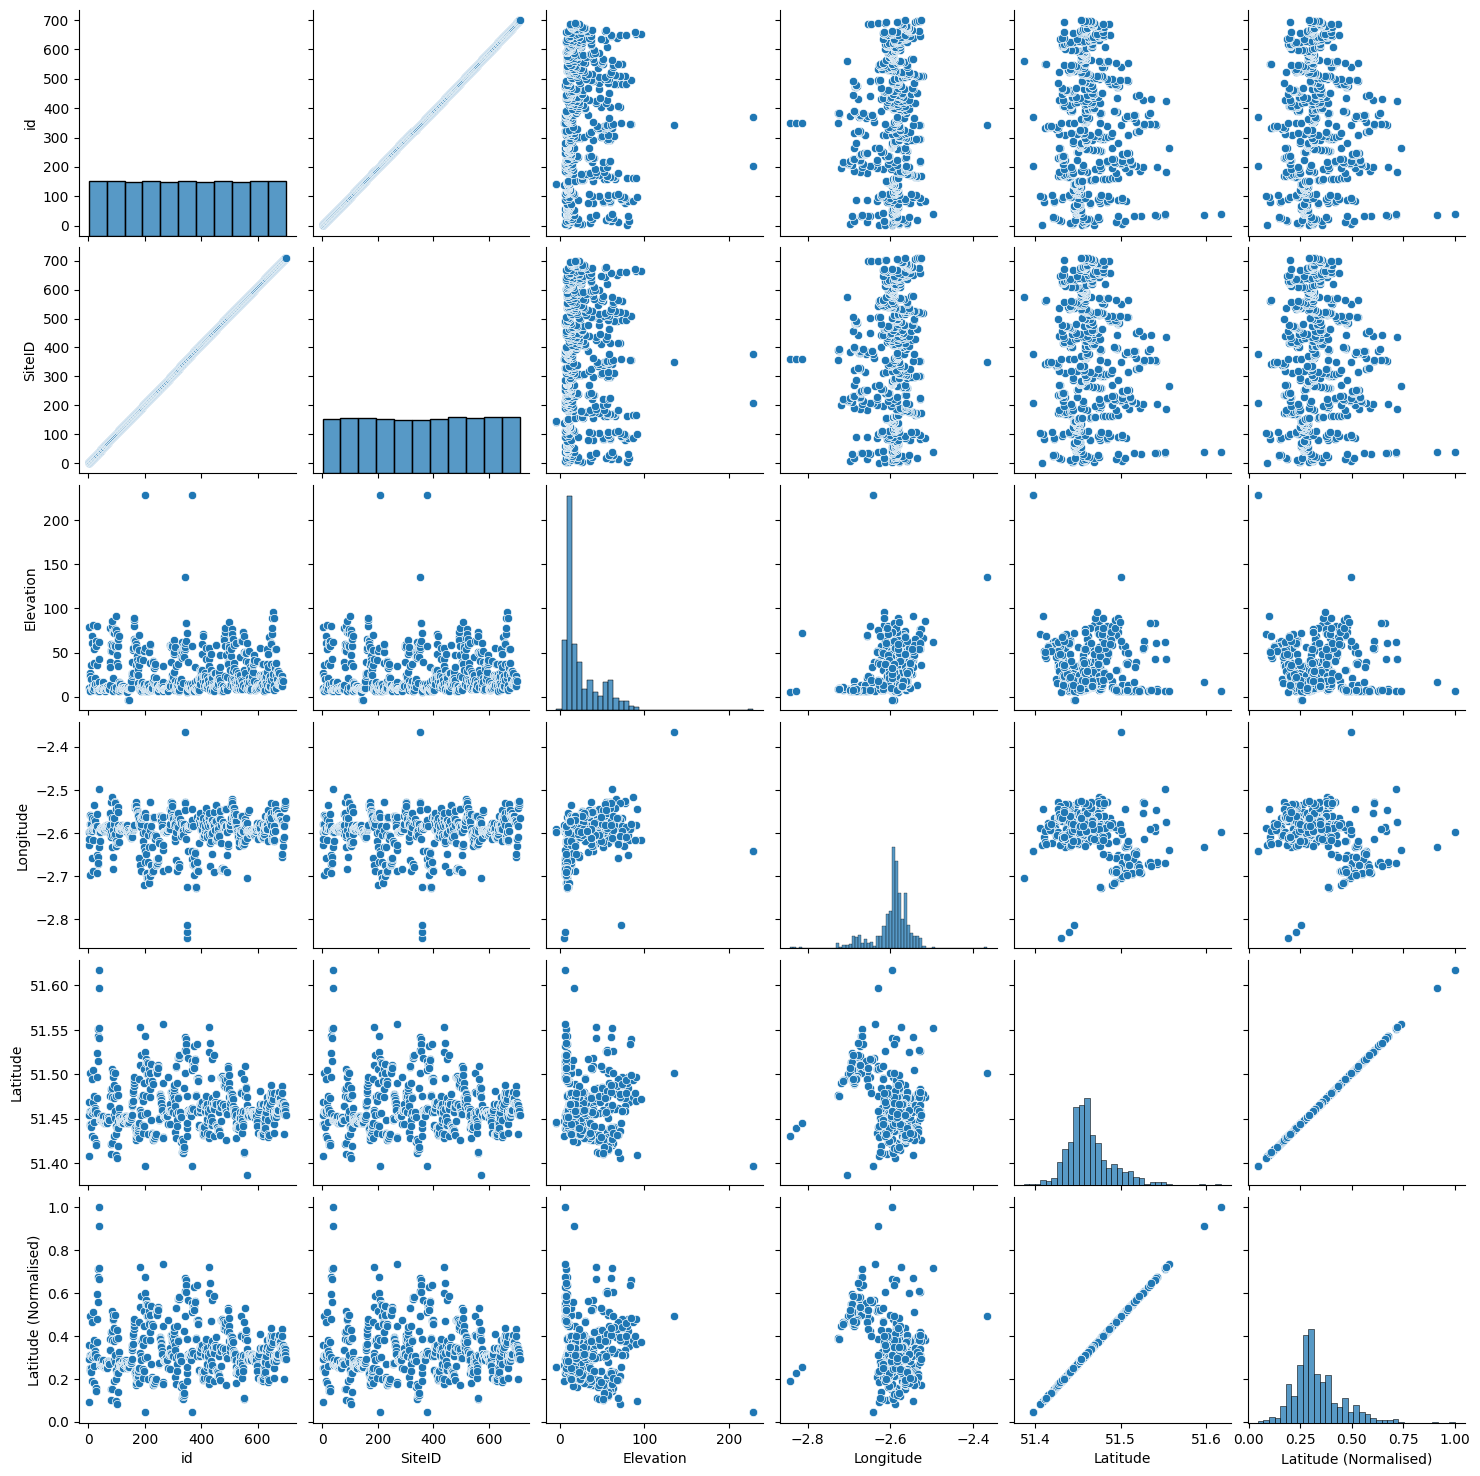

In [30]:
sns.pairplot(data=df.toPandas())

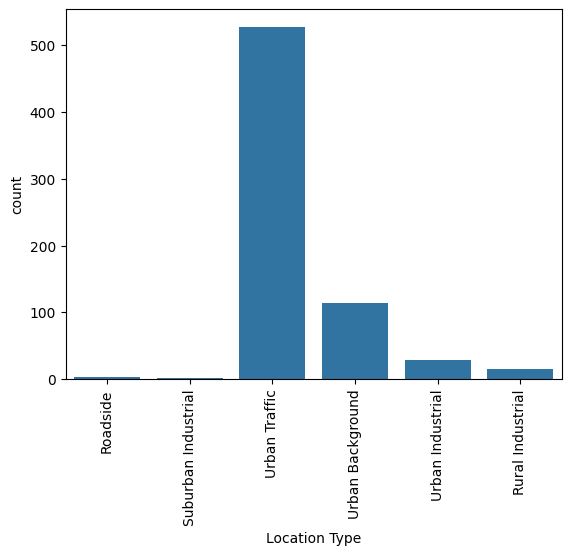

In [31]:
# df.groupBy("Location Type").count("Location Type")\
#     .show()

loctype_df = df.groupBy("Location Type").count()
sns.barplot(data=loctype_df.toPandas(), x="Location Type", y="count")
plt.xticks(rotation=90)
plt.show()

In [32]:
df.toPandas()

,id,SiteID,location,Location Type,coordinates,Pollutants,Elevation,Longitude,Latitude,Latitude (Normalised)
0,1,1,Withywood School,Urban Traffic,"[-2.6277488032062446, 51.407745517999835]",BTX NO2,NaN,-2.627749,51.407746,0.090933
1,2,2,Colston Avenue,Urban Traffic,"[-2.5968139474821794, 51.454556566902696]",NO2,9.5,-2.596814,51.454557,0.293816
2,3,3,Blackboy Hill,Urban Traffic,"[-2.613994167991525, 51.46920548941127]",NO2,79.2,-2.613994,51.469205,0.357306
3,4,4,Three Lamps,Urban Traffic,"[-2.578333463205696, 51.444209895530584]",NO2,26.6,-2.578333,51.444210,0.248973
4,5,5,Bedminster Parade,Urban Traffic,"[-2.595294420664777, 51.442812042759506]",NO2,8.1,-2.595294,51.442812,0.242914
...,...,...,...,...,...,...,...,...,...,...
695,696,707,Rodney Road junction with Whiteway Road,None,"[-2.5279124420175134, 51.46529043268529]",NO2,NaN,-2.527912,51.465290,0.340337
696,697,708,Whiteway Road junction with A420,None,"[-2.5356705609472345, 51.4615416882718]",NO2,NaN,-2.535671,51.461542,0.324090
697,698,709,Air Balloon Hill Primary School,None,"[-2.530569245243335, 51.458570621919755]",NO2,NaN,-2.530569,51.458571,0.311213
698,699,710,Nags Head Hill,None,"[-2.5259994213446975, 51.45419426540695]",NO2,NaN,-2.525999,51.454194,0.292246


In [33]:
import plotly.express as px

geo_df = df.toPandas()

fig = px.scatter_map(geo_df,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="location",
                        zoom=10)
fig.show()

In [34]:
csv_df = spark.read.csv("ContinuousAirQuality.csv", header=True, inferSchema=True)

In [35]:
null_count = csv_df.select([F.sum(col(c).isNull().cast("int")).alias(c) for c in csv_df.columns])
null_count.show()


+-------+--------+-------+--------+---------+------+------+------+-------+-------+
|SITE_ID|LOCATION|EASTING|NORTHING|DATE_TIME|    NO|   NOX|   NO2|  PM2_5|   PM10|
+-------+--------+-------+--------+---------+------+------+------+-------+-------+
|      0|       0|      0|       0|        0|129636|135972|138757|1453924|1249738|
+-------+--------+-------+--------+---------+------+------+------+-------+-------+



In [36]:
csv_df.filter(col("NO").isNull()).show()

+-------+-------------------+-------+--------+----------------+----+----+----+-----+----+
|SITE_ID|           LOCATION|EASTING|NORTHING|       DATE_TIME|  NO| NOX| NO2|PM2_5|PM10|
+-------+-------------------+-------+--------+----------------+----+----+----+-----+----+
|    188|AURN Bristol Centre| 359406|  173299|01/01/1993 00:00|NULL|NULL|NULL| NULL|NULL|
|    188|AURN Bristol Centre| 359406|  173299|01/01/1993 01:00|NULL|NULL|NULL| NULL|NULL|
|    188|AURN Bristol Centre| 359406|  173299|01/01/1993 02:00|NULL|NULL|NULL| NULL|NULL|
|    188|AURN Bristol Centre| 359406|  173299|01/01/1993 03:00|NULL|NULL|NULL| NULL|NULL|
|    188|AURN Bristol Centre| 359406|  173299|01/01/1993 04:00|NULL|NULL|NULL| NULL|NULL|
|    188|AURN Bristol Centre| 359406|  173299|01/01/1993 05:00|NULL|NULL|NULL| NULL|NULL|
|    188|AURN Bristol Centre| 359406|  173299|01/01/1993 06:00|NULL|NULL|NULL| NULL|NULL|
|    188|AURN Bristol Centre| 359406|  173299|01/01/1993 07:00|NULL|NULL|NULL| NULL|NULL|
|    188|A

In [37]:
csv_df_clean = csv_df.dropna(how="any")

+-------+------------------+
|SITE_ID|            Avg_NO|
+-------+------------------+
|    209|  88.6956860564742|
|    206| 169.8539232950572|
|    203| 22.48464297281046|
|    188| 39.14171432878855|
|    271|16.388610912902664|
|    213| 65.63642083501865|
|    228|102.17944026030236|
|    270| 42.96461048147476|
|    215| 38.35466068825329|
|    375|58.118193114895924|
|    452|12.145855352520629|
|    447|46.801717481939264|
|    395|36.446677771684314|
|    463|28.451024349974848|
|    481|              NULL|
|    501| 65.15577366452885|
|    500|24.086869128595477|
|    672|19.529733017499506|
|    459|28.735420389347617|
+-------+------------------+



<Axes: xlabel='SITE_ID', ylabel='Avg_NO'>

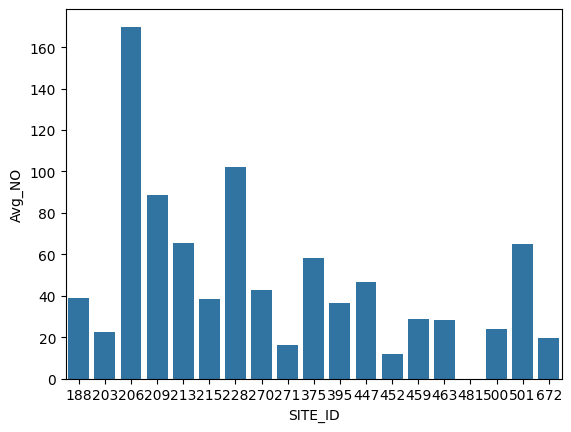

In [38]:
data = csv_df.groupBy("SITE_ID").agg(F.avg("NO").alias("Avg_NO"))
data.show()
sns.barplot(data=data.toPandas(), x="SITE_ID", y="Avg_NO")

In [41]:
def apiaccess(url):
    try:
        response = requests.get(url)
        geojson_data = response.json()
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")

    except requests.exceptions.ConnectionError as conn_err:
        print(f"Connection error occurred: {conn_err}")

    except requests.exceptions.Timeout as timeout_err:
        print(f"Timeout error occurred: {timeout_err}")

    except requests.exceptions.RequestException as req_err:
        print(f"An error occurred with the request: {req_err}")

    except ValueError as json_err:
        print(f"Failed to parse JSON: {json_err}")

    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        
    else:
        features = geojson_data.get("features", [])
        json_features = [json.dumps(feature) for feature in features]
        rdd = spark.sparkContext.parallelize(json_features)
        dataframe = spark.read.json(rdd)
        return(dataframe)

In [70]:
df_no2 = apiaccess("https://services2.arcgis.com/a4vR8lmmksFixzmB/arcgis/rest/services/AnnualNO2diffusionBNG_gdb/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson")

In [71]:
df_no2.show(truncate=False)

+----------------------------------------------+---+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+
|geometry                                      |id |properties                                                                                                                                                                                                                                                           |type   |
+----------------------------------------------+---+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-------+
|{[-2.58079714839442, 51.461498

In [72]:
df_no2 = df_no2.select('id',
                       'geometry',
                           df_no2.geometry.coordinates.alias("coordinates"),
                           "Year",
                     
                    #  col('properties.Site_Type').alias('Site_Type'),
                    col('properties.Location').alias('Location'),
                    col('properties.Historical_annual_data').alias('Historical_annual_data'),
                    col('properties.Count_').alias('Count'),
                    col('properties.Concentration_ugm_3').alias('Concentration_ugm_3'),
                    col('properties.Year').alias('Year'),
                    col('properties.SiteID').alias('SiteID')
                       )




AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Year` cannot be resolved. Did you mean one of the following? [`id`, `type`, `geometry`, `properties`].;
'Project [id#1321L, geometry#1320, geometry#1320.coordinates AS coordinates#1345, 'Year, properties#1322.Location AS Location#1346, properties#1322.Historical_annual_data AS Historical_annual_data#1347, properties#1322.Count_ AS Count#1348L, properties#1322.Concentration_ugm_3 AS Concentration_ugm_3#1349, properties#1322.Year AS Year#1350, properties#1322.SiteID AS SiteID#1351L]
+- LogicalRDD [geometry#1320, id#1321L, properties#1322, type#1323], false


In [ ]:
df_no2.show(truncate=False)

+---+----------------------------------------------+-------------------------------------+----------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+-------------------+----+------+
|id |geometry                                      |coordinates                          |Location                                                  |Historical_annual_data                                                                                                                                              |Count|Concentration_ugm_3|Year|SiteID|
+---+----------------------------------------------+-------------------------------------+----------------------------------------------------------+-------------------------------------------------------------------------------------------------------------------------------------------------

<Axes: xlabel='SiteID', ylabel='Concentration_ugm_3'>

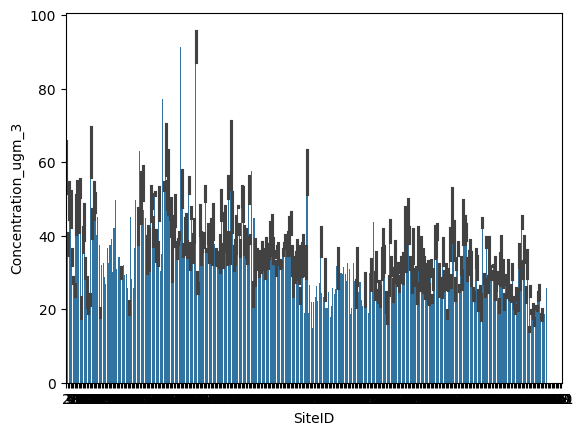

In [ ]:
sns.barplot(data=df_no2.toPandas(), x="SiteID", y="Concentration_ugm_3")

In [ ]:
null_count = df_no2.select([F.sum(col(c).isNull().cast("int")).alias(c) for c in df_no2.columns])
null_count.show()


+---+--------+-----------+--------+----------------------+-----+-------------------+----+------+
| id|geometry|coordinates|Location|Historical_annual_data|Count|Concentration_ugm_3|Year|SiteID|
+---+--------+-----------+--------+----------------------+-----+-------------------+----+------+
|  0|       0|          0|       0|                    21|   11|                 11|   0|     0|
+---+--------+-----------+--------+----------------------+-----+-------------------+----+------+



In [ ]:
df_no2 = df_no2.dropna(subset=["Concentration_ugm_3"])

In [ ]:
null_count = df_no2.select([F.sum(col(c).isNull().cast("int")).alias(c) for c in df_no2.columns])
null_count.show()


+---+--------+-----------+--------+----------------------+-----+-------------------+----+------+
| id|geometry|coordinates|Location|Historical_annual_data|Count|Concentration_ugm_3|Year|SiteID|
+---+--------+-----------+--------+----------------------+-----+-------------------+----+------+
|  0|       0|          0|       0|                    10|    0|                  0|   0|     0|
+---+--------+-----------+--------+----------------------+-----+-------------------+----+------+



In [ ]:
df_no2 = df_no2.withColumn("Longitude", col("coordinates")[0])
df_no2 = df_no2.withColumn("Latitude", col("coordinates")[1])

In [ ]:
df_no2.filter(df["Year"] == 2023).toPandas()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `Year` cannot be resolved. Did you mean one of the following? [`id`, `SiteID`, `location`, `Location Type`, `coordinates`, `Pollutants`, `Elevation`, `Longitude`, `Latitude`, `Latitude (Normalised)`].

In [ ]:
import plotly.express as px

geo_df = df_no2.toPandas()

fig = px.scatter_map(geo_df,
                        lat="Latitude",
                        lon="Longitude",
                        hover_name="Location",
                        size="Concentration_ugm_3",
                        color="Concentration_ugm_3",

                        zoom=10)
fig.show()